In [1]:
import numpy as np
from numpy import sin, pi, linspace, arange, array, max, zeros, abs

import matplotlib.pyplot as plt

In [2]:
# spatial period X = 100 mm
X = 100 # mm
# spatial freq. f = 1/X
f = 1/X

In [3]:
x = arange(0,400.1,5) # 500 mm in 10 s, 5 mm resolution
x

array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
        55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100., 105.,
       110., 115., 120., 125., 130., 135., 140., 145., 150., 155., 160.,
       165., 170., 175., 180., 185., 190., 195., 200., 205., 210., 215.,
       220., 225., 230., 235., 240., 245., 250., 255., 260., 265., 270.,
       275., 280., 285., 290., 295., 300., 305., 310., 315., 320., 325.,
       330., 335., 340., 345., 350., 355., 360., 365., 370., 375., 380.,
       385., 390., 395., 400.])

In [4]:
def f(x, X=100, x0=0):
    y = abs(sin(2*pi*1/X*(x-x0)))
    y[y<0] = 0
    return(y)

[]

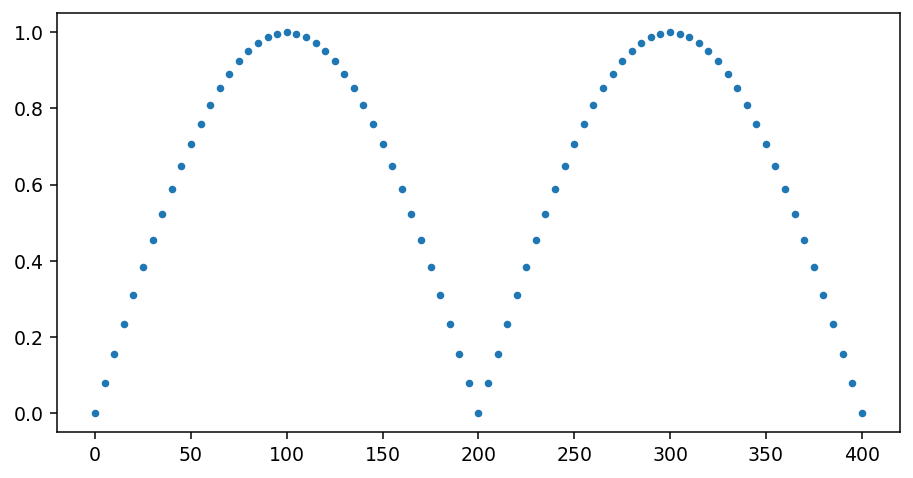

In [5]:
fig, ax = plt.subplots(figsize=(8,4), dpi=136)
ax.plot(x,f(x, X=400, x0=0), ".")
plt.plot()

In [6]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from IPython.display import HTML

In [7]:
N = len(x)
dt = 100 # ms
z = f(x, X=400, x0=0)
xmax = max(x)

In [8]:
xmax

400.0

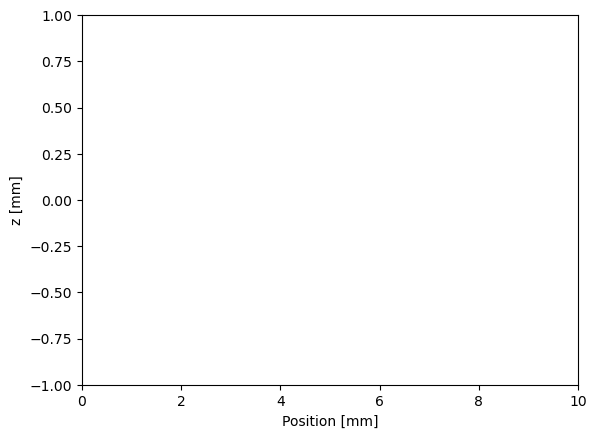

In [13]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import ipywidgets as widgets
from IPython.display import display, HTML

def update(frame):
    # for each frame, update the data stored on each artist.
    xp = x[:frame]
    yp = z[:frame]
    # update the scatter plot:
    data = np.stack([xp, yp]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(xp)
    line2.set_ydata(yp)
    return (scat, line2)

N = 100
dt = 100
x = np.linspace(0, 10, N)
z = np.sin(x)

xmax = 10

# Create a slider for manual control
step_slider = widgets.IntSlider(
    value=0,
    min=0,
    max=N,
    description='Step:',
    continuous_update=False
)

fig, ax = plt.subplots()
scat = ax.scatter(x[0], z[0], c="b", s=5)
line2, = ax.plot(x[0], z[0])  # Create a Line2D artist
ax.set(xlim=[0, xmax], ylim=[-1, 1], xlabel='Position [mm]', ylabel='z [mm]')

ani = animation.FuncAnimation(fig=fig, func=update, frames=N+1, interval=dt)

# Display the animation controls
#out = widgets.interactive_output(update, {'frame': step_slider})
#display(widgets.HBox([step_slider, out]))

# Start the animation
display(HTML(ani.to_jshtml()))


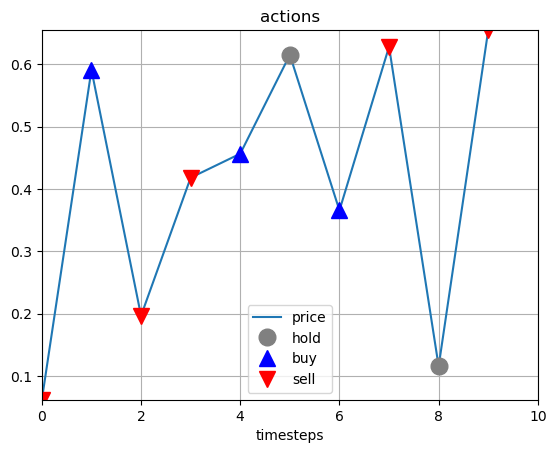

In [10]:
import numpy as np
from matplotlib import pyplot as plt

class LivePlotNotebook(object):
    """
    Live plot using %matplotlib notebook in jupyter notebook
    
    Usage:
    ```
    import time
    liveplot = LivePlotNotebook()
    x=np.random.random((10,))
    for i in range(10):
        time.sleep(1)
        liveplot.update(
            x=x+np.random.random(x.shape)/10,
            actions=np.random.randint(0, 3, size=(10,))
        )
    ```
    
    url:
    """

    def __init__(self):
#        %matplotlib notebook
        fig,ax = plt.subplots(1,1)
        
        ax.plot([0]*20, label='price')
        ax.plot([1]*20, [1]*20, 'o', ms=12,c='gray', label='hold')
        ax.plot([0]*20, [0]*20, '^', ms=12,c='blue', label='buy' )
        ax.plot([0]*20, [0]*20, 'v', ms=12,c='red', label='sell')
        
        ax.set_xlim(0,1)
        ax.set_ylim(0,1)
        ax.legend()
        ax.set_xlabel('timesteps')
        ax.grid()
        ax.set_title('actions')
        
        self.ax = ax
        self.fig = fig

    def update(self, x, actions):             
        # update price
        line = self.ax.lines[0]
        line.set_xdata(range(len(x)))
        line.set_ydata(x)
        
        # update action plots
        for i, line in enumerate(self.ax.lines[1:]):
            line.set_xdata(np.argwhere(actions==i).T)
            line.set_ydata(x[actions==i])
            line.set_marker(['o','^','v'][i])

        # update limits
        self.ax.set_xlim(0, len(actions))
        self.ax.set_ylim(x.min(), x.max())

        self.fig.canvas.draw()
        
# Test
import time
liveplot = LivePlotNotebook()
x=np.random.random((10,))
for i in range(10):
    time.sleep(1)
    liveplot.update(
        x=x+np.random.random(x.shape)/10,
        actions=np.random.randint(0, 3, size=(10,))
    )